## read in data

In [1]:
# data
import pandas as pd
import numpy as np
df = pd.read_parquet('./material/soc.topsoil_organized.pq')
print('original', df.shape)

original (94248, 421)


In [2]:
# covariate
covs = df.columns[13::].tolist()
covs.remove('type')
covs.remove('tile_id')

In [3]:
# param
version = 'v20250301'
df['soc_log1p'] = np.log1p(df['soc'])

## split the data

In [4]:
ttid = pd.read_csv('./material/test_temporal_ids_v20250301.txt', header=None)[0].tolist() 
print(len(ttid))
ttid = [str(i) for i in ttid]

test = df.loc[df['id'].isin(ttid)] # used exclusively for soc temporal validation
test.to_parquet('./material/data_test_v20250301.pq')
print(test.shape)
other = df.loc[~df['id'].isin(ttid)]
cal = other.sample(5000, random_state=42)
cal.to_parquet('./material/data_cal_v20250301.pq')
print(cal.shape)
train = other.drop(cal.index)
print(train.shape)
train.to_parquet('./material/data_train_v20250301.pq')

1000
(3000, 422)
(5000, 422)
(86248, 422)


## check distribution

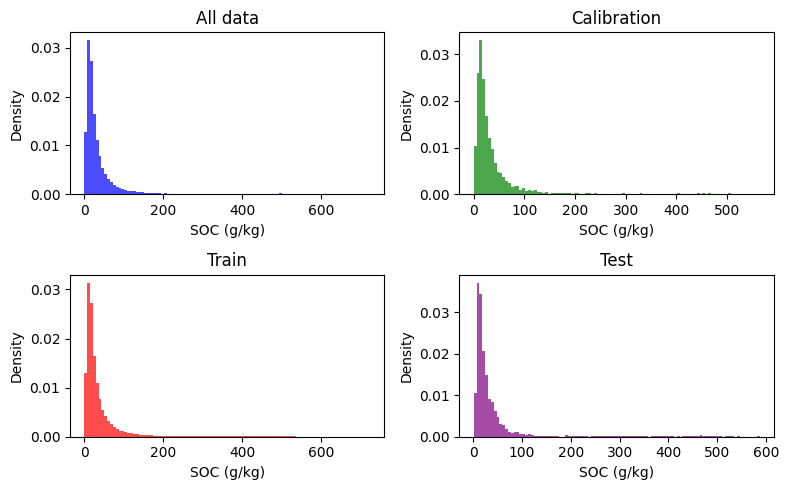

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

axes[0, 0].hist(df["soc"], bins=100, alpha=0.7, color="blue", density=True)
axes[0, 0].set_title("All data")
axes[0, 0].set_xlabel("SOC (g/kg)")
axes[0, 0].set_ylabel("Density")

axes[0, 1].hist(cal["soc"], bins=100, alpha=0.7, color="green", density=True)
axes[0, 1].set_title("Calibration")
axes[0, 1].set_xlabel("SOC (g/kg)")
axes[0, 1].set_ylabel("Density")

axes[1, 0].hist(train["soc"], bins=100, alpha=0.7, color="red", density=True)
axes[1, 0].set_title("Train")
axes[1, 0].set_xlabel("SOC (g/kg)")
axes[1, 0].set_ylabel("Density")

axes[1, 1].hist(test["soc"], bins=100, alpha=0.7, color="purple", density=True)
axes[1, 1].set_title("Test")
axes[1, 1].set_xlabel("SOC (g/kg)")
axes[1, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()

/tmp/ipykernel_2337919/1260086113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['soc_log1p'] = np.log1p(idf['soc'])


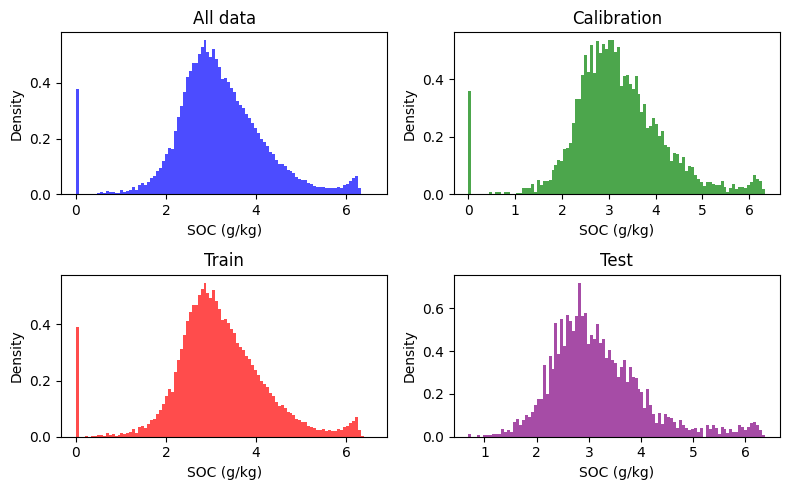

In [6]:


import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

axes[0, 0].hist(df["soc_log1p"], bins=100, alpha=0.7, color="blue", density=True)
axes[0, 0].set_title("All data")
axes[0, 0].set_xlabel("SOC (g/kg)")
axes[0, 0].set_ylabel("Density")

axes[0, 1].hist(cal["soc_log1p"], bins=100, alpha=0.7, color="green", density=True)
axes[0, 1].set_title("Calibration")
axes[0, 1].set_xlabel("SOC (g/kg)")
axes[0, 1].set_ylabel("Density")

axes[1, 0].hist(train["soc_log1p"], bins=100, alpha=0.7, color="red", density=True)
axes[1, 0].set_title("Train")
axes[1, 0].set_xlabel("SOC (g/kg)")
axes[1, 0].set_ylabel("Density")

axes[1, 1].hist(test["soc_log1p"], bins=100, alpha=0.7, color="purple", density=True)
axes[1, 1].set_title("Test")
axes[1, 1].set_xlabel("SOC (g/kg)")
axes[1, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()